In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Multicolored image thresholding

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

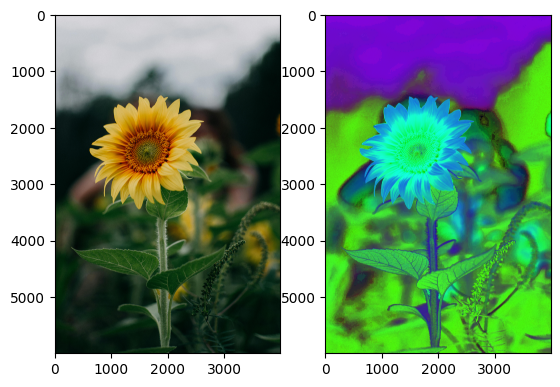

In [ ]:
input_image_path = '/content/drive/MyDrive/Colab Notebooks/image_processing_batch-2/images/pexels-maxandrey-1366630.jpg'

image = cv.imread(input_image_path)

img_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

img_hsv = cv.cvtColor(image, cv.COLOR_BGR2HSV)

plt.subplot( 1, 2, 1)
plt.imshow(img_rgb)
plt.subplot(1, 2, 2)
plt.imshow(img_hsv)

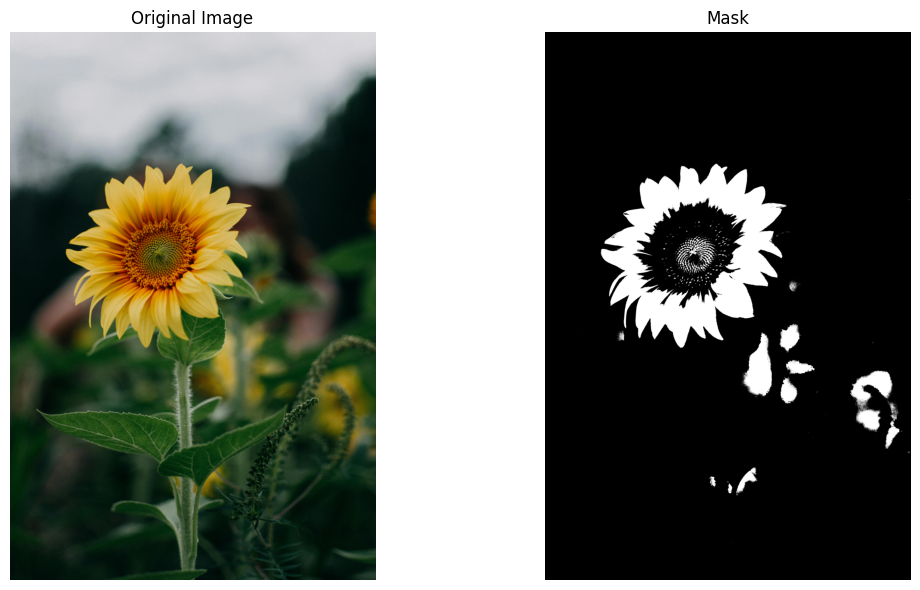

In [ ]:
# Define range of blue color in HSV
lower_yellow = np.array([20, 100, 100])  # Lower bound for yellow
upper_yellow = np.array([30, 255, 255])  # Upper bound for yellow

# Threshold the HSV image to get only blue colors
thresholded = cv.inRange(img_hsv, lower_yellow, upper_yellow)  # cv.inRange(input_img, lowerb, upperb)


# image_rgb = cv.cvtColor(image, cv.COLOR_BGR2RGB)

# Display the images using Matplotlib
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.imshow(img_rgb)
plt.title('Original Image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(thresholded, cmap='gray')
plt.title('Mask')
plt.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
print(image.shape)

(6000, 4000, 3)


In [ ]:
# height, width = image.shape[:2]
height, width, ch = image.shape

mask = np.zeros((height,width), dtype=np.uint8) # creating the canvas for masking

# roi
square_size = 1000

top_left_x = (width - square_size)//2
top_left_y = (height - square_size)//2

bottom_right_x = top_left_x + square_size
bottom_right_y = top_left_y + square_size

mask[top_left_y:bottom_right_y, top_left_x:bottom_right_x] = 255


In [ ]:
print(mask[top_left_y-square_size:top_left_y+square_size, top_left_x:top_left_x+square_size])

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]


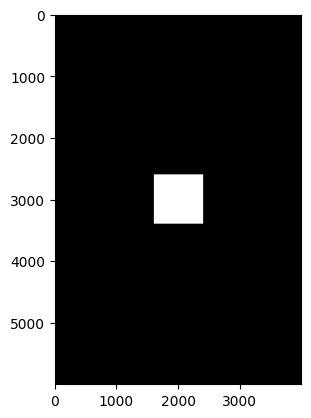

In [ ]:
plt.imshow(mask, cmap='gray')

In [ ]:
mask.shape

(6000, 4000)

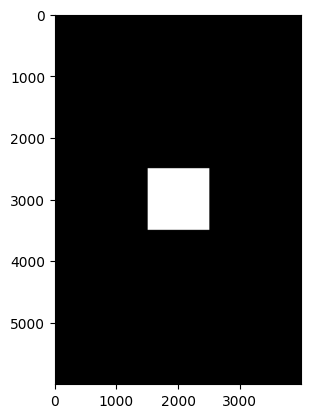

In [ ]:
mask_rgb = cv.cvtColor(mask, cv.COLOR_GRAY2RGB)
plt.imshow(mask_rgb)

In [ ]:
print(mask_rgb.shape)

(6000, 4000, 3)


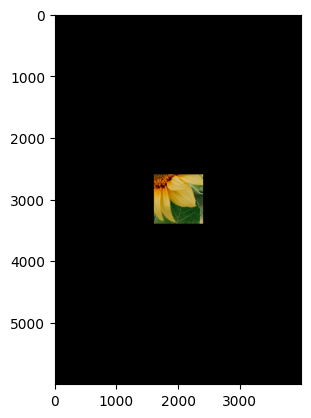

In [ ]:
masked_image = cv.bitwise_and(img_rgb, mask_rgb)
plt.imshow(masked_image)